<a href="https://colab.research.google.com/github/Aditya120112/Intelligent-Predictive-Maintenance-System-for-Milling-machine-using-Machine-learning./blob/main/Copy_of_Untitled46.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('ai4i2020.csv')
df.head()
df.shape
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Machine failure,0
TWF,0


In [ ]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

Making hist plots

<Axes: xlabel='Air temperature [K]', ylabel='Count'>

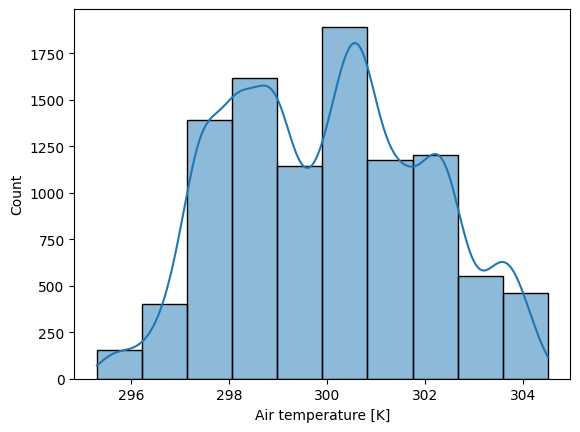

In [ ]:
sns.histplot(df['Air temperature [K]'], kde=True,bins=10)

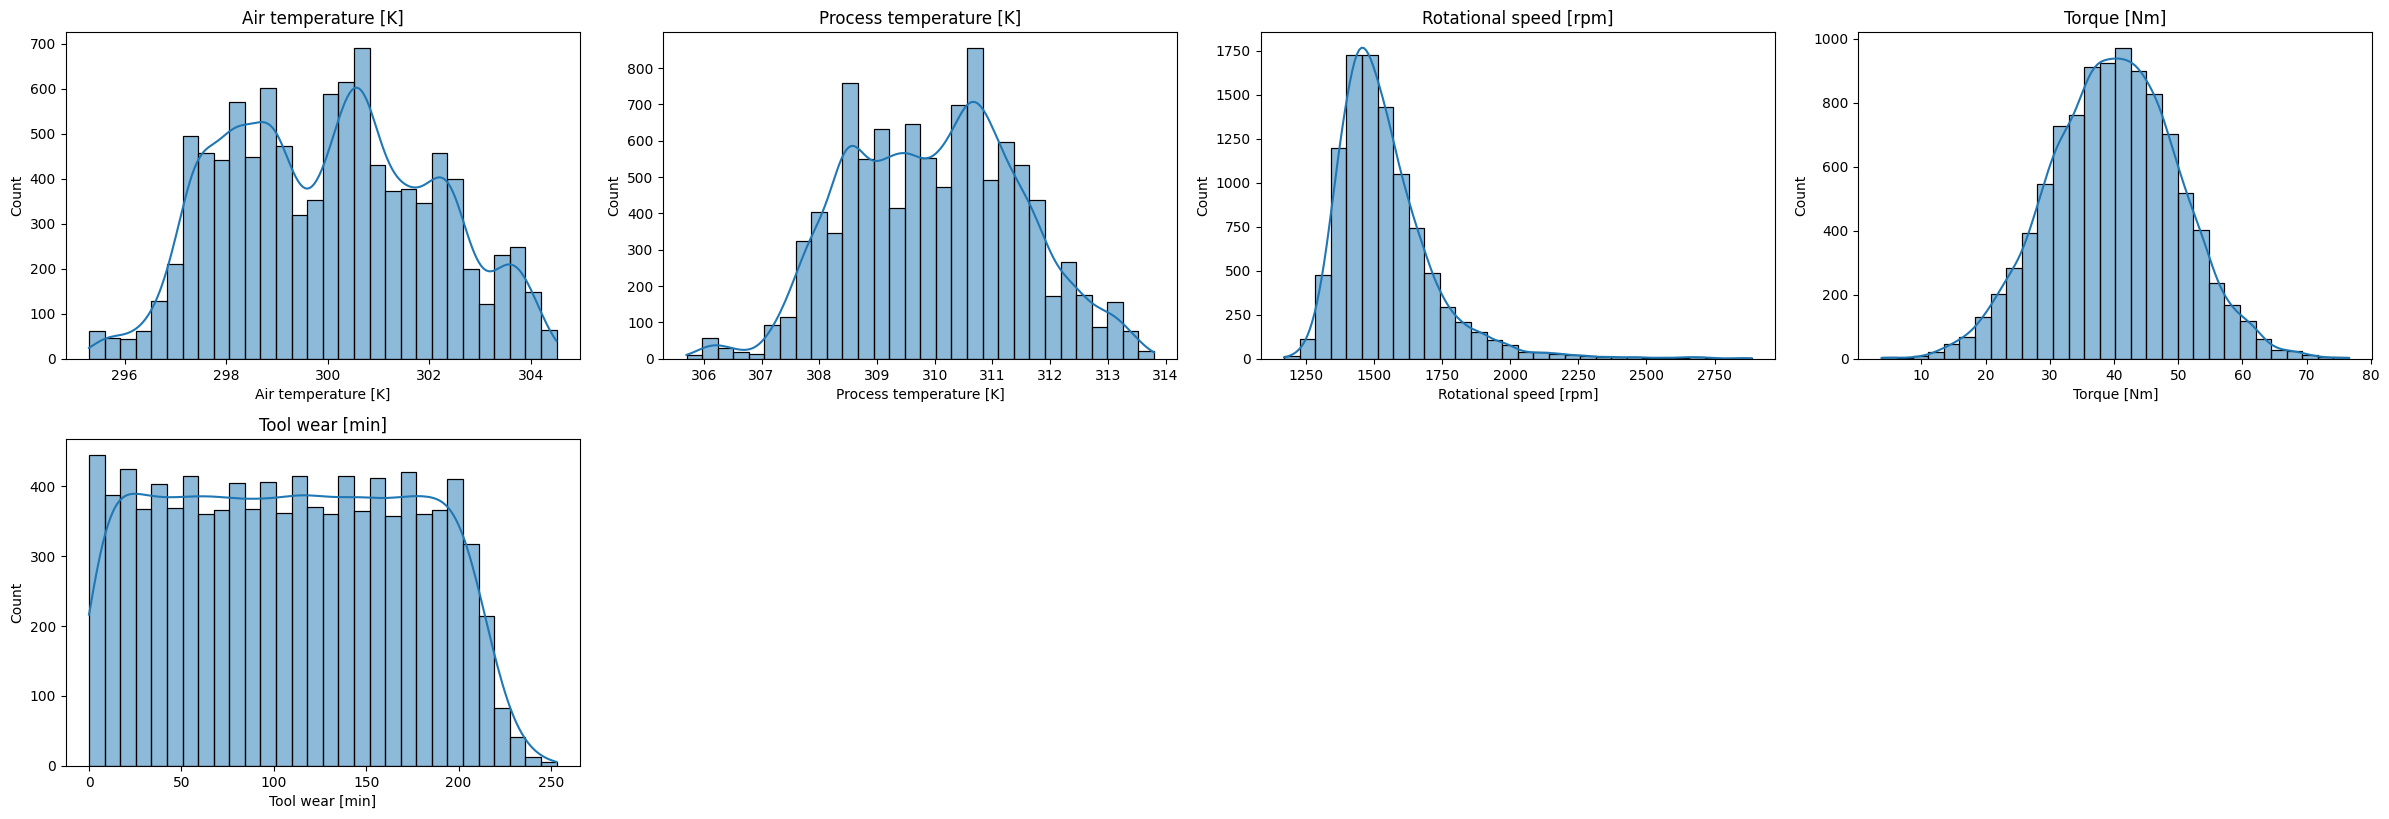

In [ ]:
nums_col=['Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]']
plt.figure(figsize=(24,16))
for i,col in enumerate(nums_col,1):
  plt.subplot(4,4,i)
  sns.histplot(df[col], kde=True, bins=30)
  plt.title(col)

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

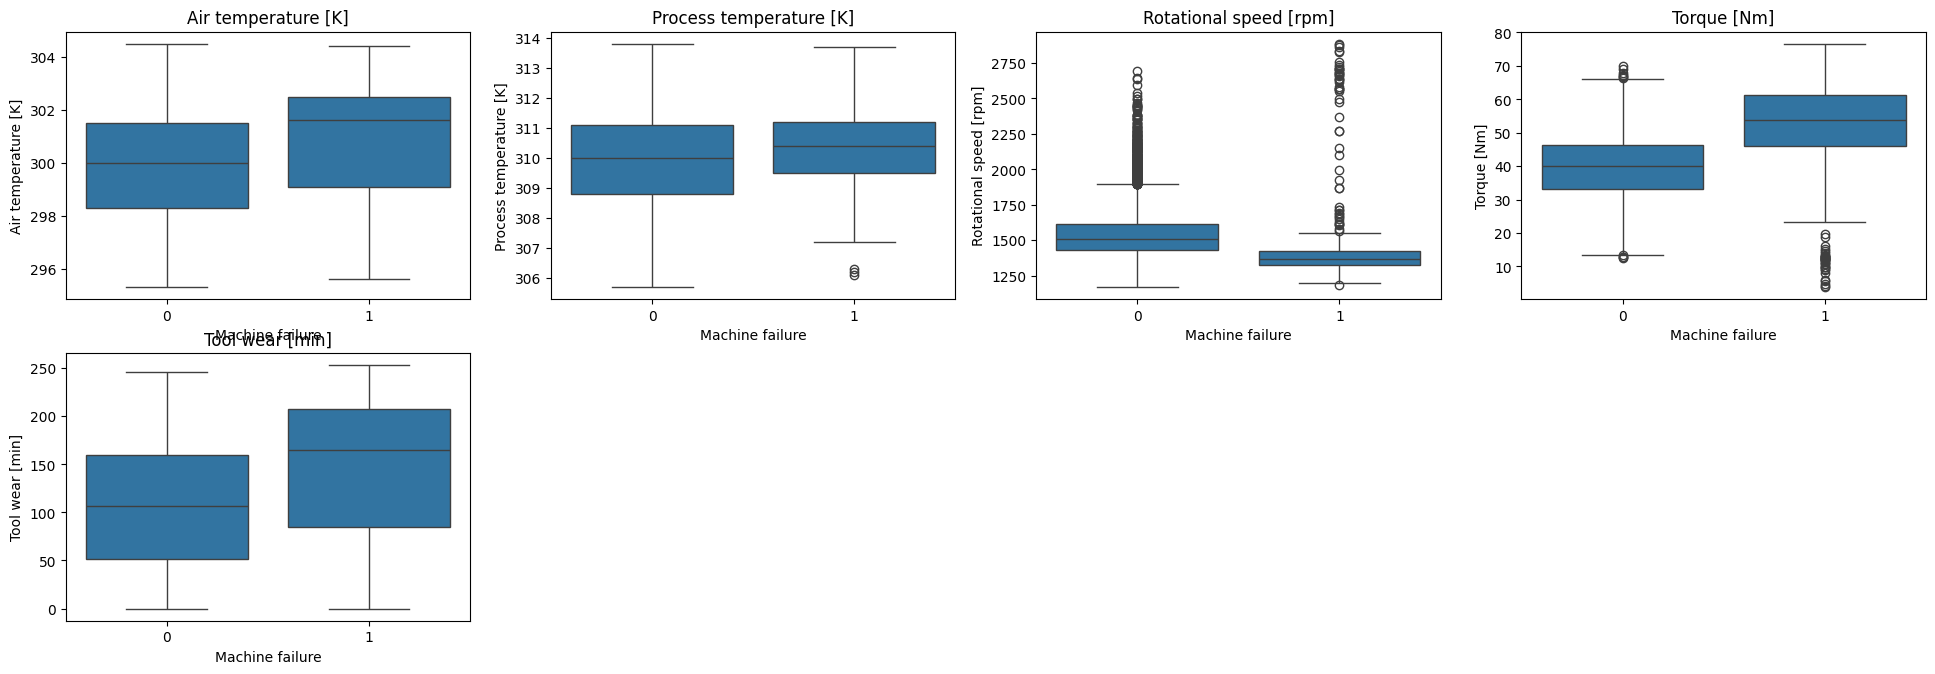

In [ ]:
plt.figure(figsize=(24,16))
for i,col in enumerate(nums_col,1):
  plt.subplot(4,4,i)
  sns.boxplot(x='Machine failure',y=col,data=df)
  plt.title(col)
plt.tight_layout
plt.show

In [ ]:
import plotly.express as px

fig = px.box(df, x='Machine failure', y='Torque [Nm]')
fig.show()

In [ ]:
fig=px.box(df,x='Machine failure',y='Torque [Nm]')
fig.show()

In [ ]:
df['Machine failure'].value_counts()

failure_cols = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
df['Machine failure'] = df[failure_cols].any(axis=1).astype(int)





In [ ]:

df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


<Axes: >

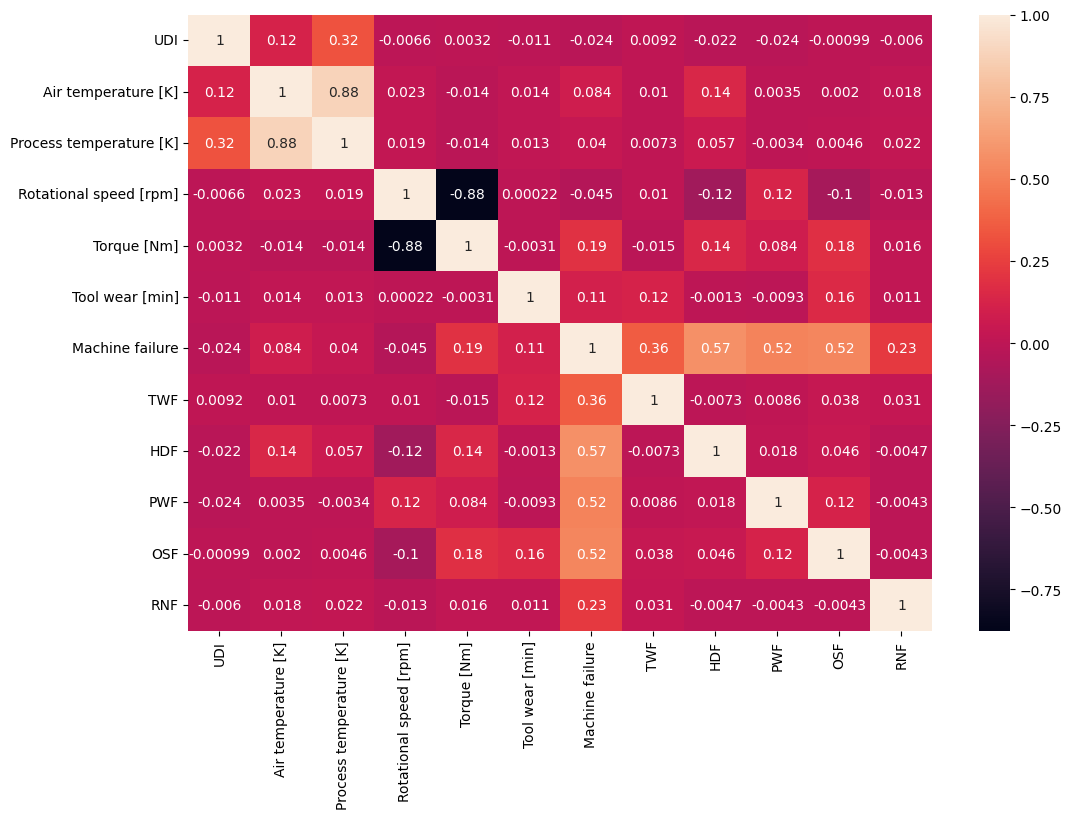

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)


In [ ]:
def failure_label(row):
  if row['TWF']==1:
    return 'Tool wear failure'
  elif row['HDF']==1:
    return 'Heat dissipation failure'
  elif row['PWF']==1:
    return 'Power failure'
  elif row['OSF']==1:
    return 'overstrain failure'
  elif row['RNF']==1:
    return 'Random failure'
  else:
    return 'No failure'
df['failure_type']=df.apply(failure_label, axis=1)
df['failure_type'].value_counts()

,count
failure_type,
No failure,9652
Heat dissipation failure,115
Power failure,91
overstrain failure,78
Tool wear failure,46
Random failure,18


<Axes: xlabel='failure_type', ylabel='count'>

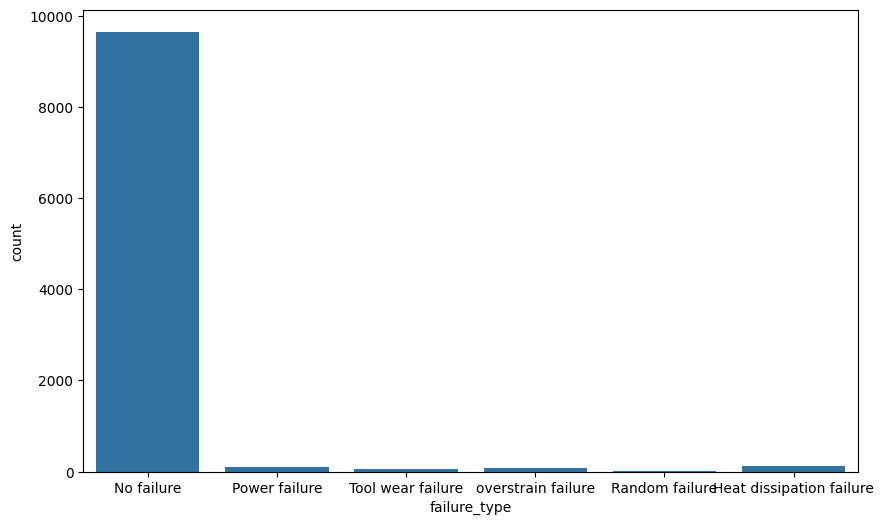

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['failure_type'])

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [ ]:
X=df.drop(['UDI','Type','Product ID','failure_type','TWF','HDF','PWF','OSF','RNF','Machine failure'],axis=1)
y=df['failure_type']
X
y

,failure_type
0,No failure
1,No failure
2,No failure
3,No failure
4,No failure
...,...
9995,No failure
9996,No failure
9997,No failure
9998,No failure


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
lr=LogisticRegression()
lr.fit(X_train_scaled,y_train)
y_pred=lr.predict(X_test_scaled)

#print(classification_report(y_test,y_pred))
#print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.9775


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
param_dists={
    'C':np.logspace(-4,4, 50),
    'penalty':['l1','l2'],
    'solver':['liblinear']
}
rs=RandomizedSearchCV(
    LogisticRegression(max_iter=2000),
    param_distributions=param_dists,
    n_iter=25,
    cv=5,
    scoring='accuracy',
    random_state=42

)
rs.fit(X_train_scaled,y_train)
y_pred=rs.predict(X_test_scaled)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

                          precision    recall  f1-score   support

Heat dissipation failure       1.00      0.18      0.30        17
              No failure       0.98      1.00      0.99      1935
           Power failure       0.93      0.78      0.85        18
          Random failure       0.00      0.00      0.00         6
       Tool wear failure       0.00      0.00      0.00        11
      overstrain failure       0.50      0.15      0.24        13

                accuracy                           0.98      2000
               macro avg       0.57      0.35      0.40      2000
            weighted avg       0.97      0.98      0.97      2000

0.9765


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
rf=RandomForestClassifier(n_estimators=300,
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

                          precision    recall  f1-score   support

Heat dissipation failure       0.63      0.71      0.67        17
              No failure       0.99      0.98      0.98      1935
           Power failure       0.62      0.72      0.67        18
          Random failure       0.00      0.00      0.00         6
       Tool wear failure       0.10      0.27      0.15        11
      overstrain failure       0.67      0.62      0.64        13

                accuracy                           0.96      2000
               macro avg       0.50      0.55      0.52      2000
            weighted avg       0.97      0.96      0.97      2000

0.9645


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
def clean_xgb_col_names(df):
    cols = df.columns
    new_cols = []
    for col in cols:

        new_col = col.replace('[', '').replace(']', '').replace('<', '')
        new_cols.append(new_col)
    df.columns = new_cols
    return df


X_train_cleaned = clean_xgb_col_names(X_train.copy())
X_test_cleaned = clean_xgb_col_names(X_test.copy())


xg = XGBClassifier()
xg.fit(X_train_cleaned, y_train_encoded)
y_pred_encoded = xg.predict(X_test_cleaned)

y_pred = le.inverse_transform(y_pred_encoded)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

                          precision    recall  f1-score   support

Heat dissipation failure       1.00      0.88      0.94        17
              No failure       0.99      1.00      0.99      1935
           Power failure       0.67      0.67      0.67        18
          Random failure       0.00      0.00      0.00         6
       Tool wear failure       0.33      0.09      0.14        11
      overstrain failure       0.70      0.54      0.61        13

                accuracy                           0.98      2000
               macro avg       0.61      0.53      0.56      2000
            weighted avg       0.98      0.98      0.98      2000

0.981


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
best_model=XGBClassifier()

In [ ]:
sample = X_test.iloc[[0]]

pred_type = xg.predict(sample)[0]
probs = xg.predict_proba(sample)[0]

print("Predicted Failure Type:", pred_type)

for cls, p in zip(xg.classes_, probs):
    print(f"{cls}: {p:.2f}")

ValueError: feature_names mismatch: ['Air temperature K', 'Process temperature K', 'Rotational speed rpm', 'Torque Nm', 'Tool wear min'] ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
expected Torque Nm, Process temperature K, Tool wear min, Rotational speed rpm, Air temperature K in input data
training data did not have the following fields: Process temperature [K], Air temperature [K], Torque [Nm], Rotational speed [rpm], Tool wear [min]

In [ ]:
# Take 1 test sample (from cleaned test data)
sample = X_test_cleaned.iloc[[0]]

# Predict encoded class
pred_encoded = xg.predict(sample)[0]

# Decode back to original label
pred_type = le.inverse_transform([pred_encoded])[0]

# Probability prediction
probs = xg.predict_proba(sample)[0]

print("Predicted Failure Type:", pred_type)

for cls, p in zip(le.inverse_transform(xg.classes_), probs):
    print(f"{cls}: {p:.4f}")


Predicted Failure Type: No failure
Heat dissipation failure: 0.0000
No failure: 0.9998
Power failure: 0.0000
Random failure: 0.0000
Tool wear failure: 0.0002
overstrain failure: 0.0000


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_cleaned, y_train_encoded)

xg.fit(X_res, y_res)
y_pred_encoded = xg.predict(X_test_cleaned)
y_pred = le.inverse_transform(y_pred_encoded)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


                          precision    recall  f1-score   support

Heat dissipation failure       1.00      0.88      0.94        17
              No failure       0.99      0.97      0.98      1935
           Power failure       0.61      0.94      0.74        18
          Random failure       0.00      0.00      0.00         6
       Tool wear failure       0.10      0.27      0.15        11
      overstrain failure       0.54      0.54      0.54        13

                accuracy                           0.96      2000
               macro avg       0.54      0.60      0.56      2000
            weighted avg       0.98      0.96      0.97      2000

0.9595


In [ ]:
sample = X_test_cleaned.iloc[[0]]

# Predict encoded class
pred_encoded = xg.predict(sample)[0]

# Decode back to original label
pred_type = le.inverse_transform([pred_encoded])[0]

# Probability prediction
probs = xg.predict_proba(sample)[0]

print("Predicted Failure Type:", pred_type)

for cls, p in zip(le.inverse_transform(xg.classes_), probs):
    print(f"{cls}: {p:.4f}")


In [ ]:
# Take random test sample
sample = X_test_cleaned.sample(1)

# Predict encoded class
pred_encoded = xg.predict(sample)[0]

# Decode to original label
pred_label = le.inverse_transform([pred_encoded])[0]

# Predict probabilities
probs = xg.predict_proba(sample)[0]

print("Predicted Failure Type:", pred_label)

for cls, p in zip(le.inverse_transform(xg.classes_), probs):
    print(f"{cls}: {p:.4f}")


Predicted Failure Type: No failure
Heat dissipation failure: 0.0000
No failure: 0.9997
Power failure: 0.0000
Random failure: 0.0000
Tool wear failure: 0.0003
overstrain failure: 0.0000


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split (VERY IMPORTANT: split BEFORE oversampling)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Apply SMOTE only on training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_cleaned, y_train_encoded)

# Check class balance
print("Before SMOTE:", dict(zip(*np.unique(y_train, return_counts=True))))
print("After SMOTE:", dict(zip(*np.unique(y_train_res, return_counts=True))))


Before SMOTE: {np.int64(0): np.int64(92), np.int64(1): np.int64(7722), np.int64(2): np.int64(73), np.int64(3): np.int64(14), np.int64(4): np.int64(37), np.int64(5): np.int64(62)}
After SMOTE: {np.int64(0): np.int64(7717), np.int64(1): np.int64(7717), np.int64(2): np.int64(7717), np.int64(3): np.int64(7717), np.int64(4): np.int64(7717), np.int64(5): np.int64(7717)}


In [ ]:
from xgboost import XGBClassifier

xg = XGBClassifier(
    objective='multi:softprob',
    eval_metric='mlogloss',
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

xg.fit(X_train_res, y_train_res)

# Predictions
y_pred = xg.predict(X_test_cleaned) # y_pred now contains encoded (numerical) labels

# For classification report, use the numerical predictions and original class names
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("Accuracy:", accuracy_score(y_test, y_pred))

                          precision    recall  f1-score   support

Heat dissipation failure       0.00      0.00      0.00        23
              No failure       0.97      0.93      0.95      1930
           Power failure       0.00      0.00      0.00        18
          Random failure       0.02      0.25      0.04         4
       Tool wear failure       0.03      0.11      0.04         9
      overstrain failure       0.00      0.00      0.00        16

                accuracy                           0.89      2000
               macro avg       0.17      0.21      0.17      2000
            weighted avg       0.93      0.89      0.91      2000

Accuracy: 0.894


In [ ]:
# Take a single sample (example: first row of cleaned test set)
sample = X_test_cleaned.iloc[[55]] # Changed X_test to X_test_cleaned

# Predict class
pred_encoded = xg.predict(sample)[0]
pred_label = le.inverse_transform([pred_encoded])[0]

# Predict probabilities
probs = xg.predict_proba(sample)[0]

print("Predicted Failure Type:", pred_label)
print("\nClass Probabilities:")

for cls, p in zip(le.classes_, probs):
    print(f"{cls}: {p:.4f}")

Predicted Failure Type: Tool wear failure

Class Probabilities:
Heat dissipation failure: 0.0001
No failure: 0.2281
Power failure: 0.0001
Random failure: 0.0001
Tool wear failure: 0.7715
overstrain failure: 0.0003


In [ ]:
importances = xg.feature_importances_
features = X.columns

fi = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(fi)

                   Feature  Importance
3              Torque [Nm]    0.328312
4          Tool wear [min]    0.289039
0      Air temperature [K]    0.151826
2   Rotational speed [rpm]    0.150321
1  Process temperature [K]    0.080502


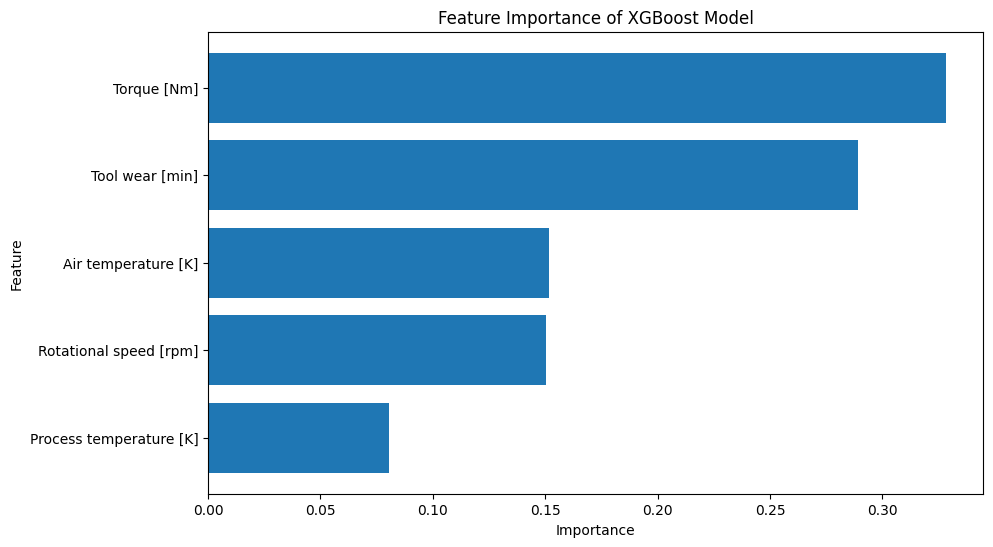

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(fi['Feature'], fi['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance of XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
